<a href="https://colab.research.google.com/github/Joseph-Dowdy/MIS-515/blob/main/Project_1_Data_Cleaning_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 60

Autosaving every 60 seconds


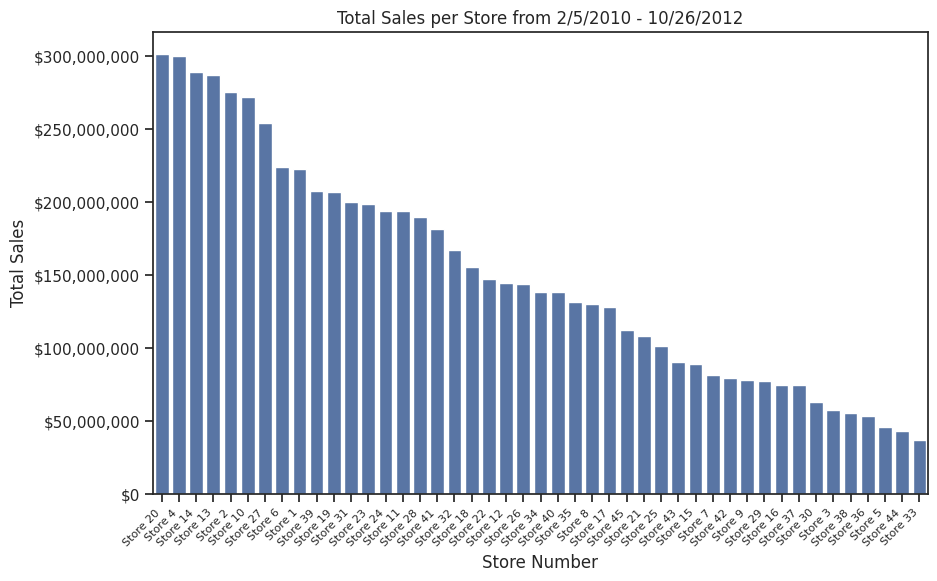

In [ ]:
## Visualization 1 - Aggregated Sales by Store
## imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #func formatter allows us to define custom functions for formatting tickmarks


# Function used to format the y-axis as currency
def currency_formatter(x, pos): # x is value to be formatted, pos is position of the tick. Required by FuncFormatter but not used/place holder argument
    return '${:,.0f}'.format(x)


# Pandas Read excel to create DF
df = pd.read_excel('/content/Walmart Sales Cleaned Date.xlsx')

# Grouping store with aggregated weekly sales and sorting
# Group the data by 'Store' and calculate the total 'Weekly_Sales' for each store, then reset the index to convert the result into a DF.
# result of group + aggregation leaves store as index (now a series), reset_index covnerts this back into a DF
sales_per_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the DataFrame 'sales_per_store' in descending order by the 'Weekly_Sales' column to rank stores from highest to lowest total sales.
sales_per_store_sorted = sales_per_store.sort_values(by='Weekly_Sales', ascending=False)

plt.figure(figsize=(10, 6))

# Seaborne bar plot, data is our ordered sales per store and order is our sales per store sorted DF
sns.barplot(x='Store', y='Weekly_Sales', data=sales_per_store_sorted, order=sales_per_store_sorted['Store'])

# Format the y-axis as currency
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Graph styling
plt.title('Total Sales per Store from 2/5/2010 - 10/26/2012')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, fontsize=8, ha='right') # rotation, smaller x axis font, and alignment create better readability

plt.show()


<ipython-input-7-0305e52aa7f5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_5_stores_data, x='Weekly_Sales', y='Store', palette="vlag", orient='h')


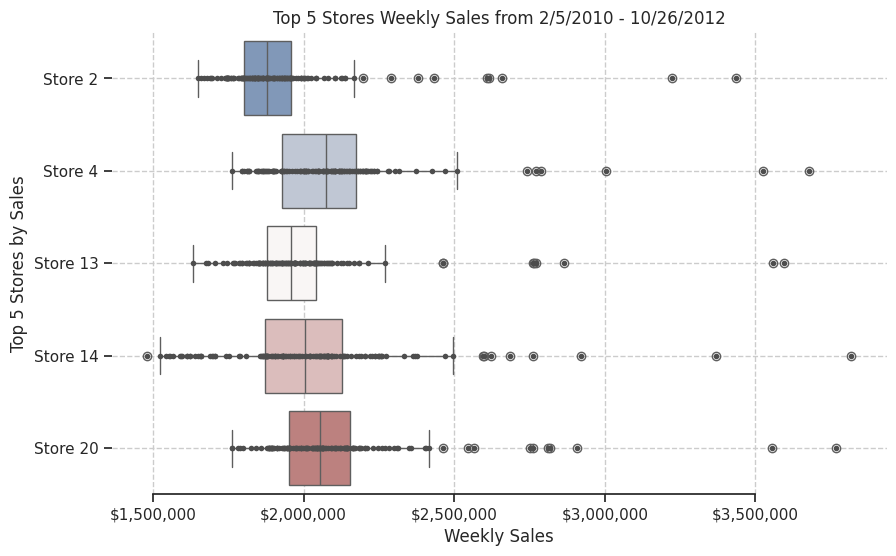

In [ ]:
## Visualization 2 Scatter Plot of Top 5 Stores Aggregated Weekly Sales
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker #func formatter allows us to define custom functions for formatting tickmarks

# Currency formatter for the y-axis
def currency_formatter(x, pos): # x is value to be formatted, pos is position of the tick. Required by FuncFormatter but not used/place holder argument
    return '${:,.0f}'.format(x)

# Pandas DF for excel file/data source
df = pd.read_excel('/content/Walmart Sales Cleaned Date.xlsx')

# Aggregate weekly sales per store and sort in descending order
total_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Create a new DataFrame containing only data from these top 5 stores
# This filters the dataset to focus our visualization on these stores
top_5_stores = total_sales_per_store.head(5).index # .head(5) returns the top 5 rows (highest sales), .index extracts the label/store of the each item from .head(5)

# Filter the original dataframe for only top 5 stores
top_5_stores_data = df[df['Store'].isin(top_5_stores)] # creating a new df comprised of only our top 5 stores by sales

# Initialize the plot
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))

# Use a boxplot to show the distribution of weekly sales across the top 5 stores
# 'orient=h' creates horizontal boxes for better readability with store names on the y-axis
sns.boxplot(data=top_5_stores_data, x='Weekly_Sales', y='Store', palette="vlag", orient='h')

# Overlay a strip plot on the box plot to show individual sales data points
# 'jitter=False' aligns points vertically for a clearer comparison of individual sales within each store
sns.stripplot(data=top_5_stores_data, x='Weekly_Sales', y='Store', size=4, color=".3", jitter=False, orient='h')

# Format the x-axis as currency
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Graph styling
plt.grid(True, which="both", ls="--") # grid on, both x and y axis, line size --
plt.xlabel("Weekly Sales")
plt.ylabel("Top 5 Stores by Sales")
plt.title("Top 5 Stores Weekly Sales from 2/5/2010 - 10/26/2012")
sns.despine(trim=True, left=True) # Remove top and right spines for a cleaner look

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


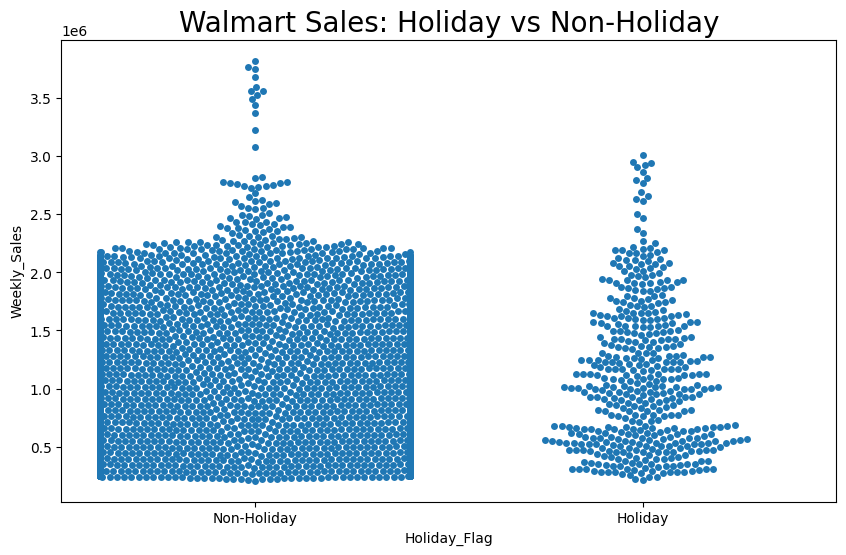

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create pd df from excel file
df = pd.read_excel('/content/Walmart Sales Cleaned Date.xlsx')

plt.figure(figsize=(10, 6))

plt.title('Walmart Sales: Holiday vs Non-Holiday', fontsize=20)

# Define the swarm plot
sns.swarmplot(x="Holiday_Flag", y="Weekly_Sales", data=df)

# x-axis labels
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])

plt.show()


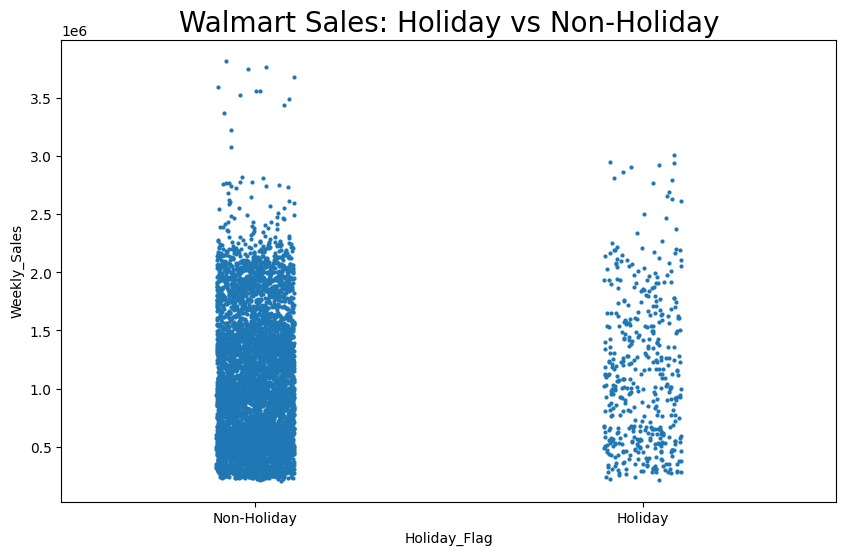

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create pd df from excel file
df = pd.read_excel('/content/Walmart Sales Cleaned Date.xlsx')

plt.figure(figsize=(10, 6))

plt.title('Walmart Sales: Holiday vs Non-Holiday', fontsize=20)

# Define the strip plot with jitter to avoid overlap
sns.stripplot(x="Holiday_Flag", y="Weekly_Sales", data=df, jitter=True, size=3)

# Customize the x-axis labels
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])

plt.show()


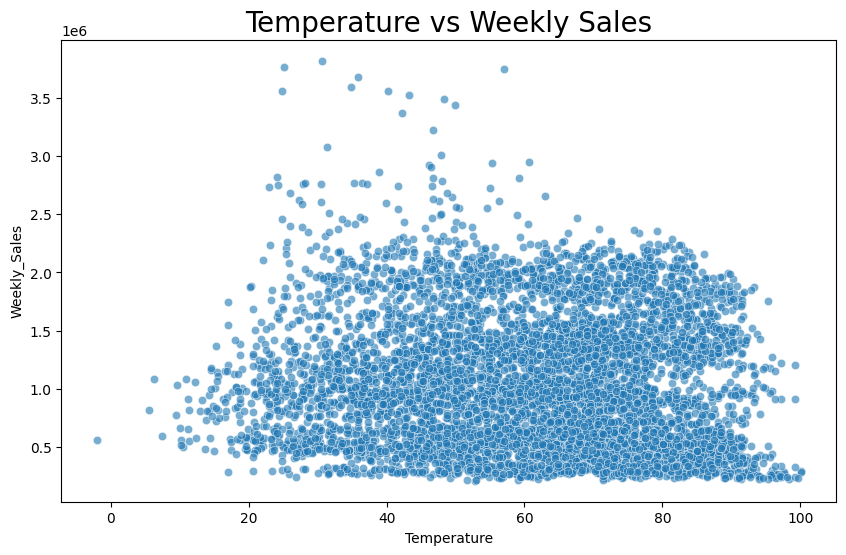

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create pd df from excel file
df = pd.read_excel('/content/Walmart Sales Cleaned Date.xlsx')

plt.figure(figsize=(10, 6))
plt.title('Temperature vs Weekly Sales', fontsize=20)

# Create the scatter plot for Temperature vs Weekly_Sales
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=df, alpha=0.6)

plt.show()


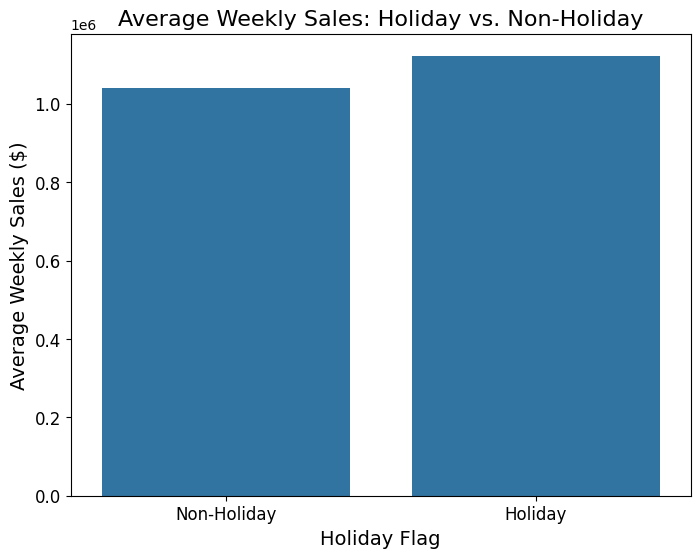

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create pd df from excel file
df = pd.read_excel('/content/Walmart Sales Cleaned Date.xlsx')

# Calculate the average weekly sales for Holiday vs. Non-Holiday
avg_sales_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

# Rename Holiday_Flag for clarity in the plot
avg_sales_holiday['Holiday_Flag'] = avg_sales_holiday['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'})

# graph styling
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=avg_sales_holiday)
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday', fontsize=16)
plt.xlabel('Holiday Flag', fontsize=14)
plt.ylabel('Average Weekly Sales ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()


<ipython-input-5-4f40559e102b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values('Date', inplace=True)


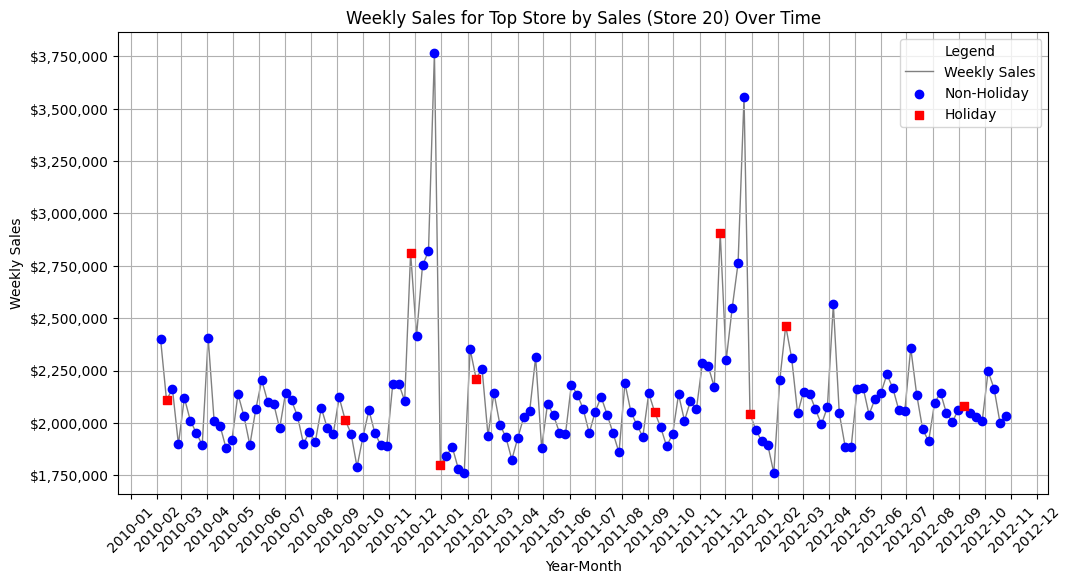

In [ ]:
# Visualization 3 - Top Store by Sales, Sales over Time (Holiday and Non-holiday identified)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # used for setting default tickmarks and for creating custom axis formating for dates
import matplotlib.ticker as ticker #func formatter allows us to define custom functions for formatting tickmarks

# load excel into pd df
df = pd.read_excel('/content/Walmart Sales Cleaned Date.xlsx')

# Aggregate sales by store to find the one with the most sales and save that into store_with_most_sales variable
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()
store_with_most_sales = total_sales_by_store.idxmax() # total_sales_by_store.idmax() returns the first occurence of the max value in the series

# Filter the DataFrame to only include data from store with most sales
df_filtered = df[df['Store'] == store_with_most_sales]

# Sort the DataFrame by date to ensure the plot is in chronological order
df_filtered.sort_values('Date', inplace=True) #in place overrides/saves the results into the original df

# Currency formatter for the y-axis
def currency_formatter(x, pos): # x is value to be formatted, pos is position of the tick. Required by FuncFormatter
    return '${:,.0f}'.format(x)


plt.figure(figsize=(12, 6)) # Create the plot

# Plotting with seaborn to get a continuous line
# x is what data goes on x axis, y is what data goes on y axis, data is data it will plot, sort false means it will not sort the data, estimator false means it will not aggregate the data/
# every data point will be plotted as is, lw is line width, z order is where it falls depth wise relative to other elements.
sns.lineplot(x='Date', y='Weekly_Sales', data=df_filtered, sort=False, estimator=None, lw=1, zorder=1, color='gray', label='Weekly Sales')

# create df for holidays & non holidays
non_holidays = df_filtered[df_filtered['Holiday_Flag'] == 0]
holidays = df_filtered[df_filtered['Holiday_Flag'] == 1]

# Add scatter plots for non-holidays and holidays with labels for the legend
plt.scatter(non_holidays['Date'], non_holidays['Weekly_Sales'], marker='o', color='blue', label='Non-Holiday', zorder=2)
plt.scatter(holidays['Date'], holidays['Weekly_Sales'], marker='s', color='red', label='Holiday', zorder=2)

# calling our currency_formatter function into ticker.FuncFormatter to create $dollar y axis values
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

# Sets the default x axis tickmarks to mdates.MonthLocator() ie a tick at every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Specifies how we want the date to be displayed on the x axis - YYYY-MM format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Titles and labels
plt.title(f"Weekly Sales for Top Store by Sales ({store_with_most_sales}) Over Time")
plt.xlabel('Year-Month')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)

# Adds a legend
plt.legend(title='Legend')

plt.show()